In [26]:
!pip install pandas_datareader

In [43]:
#nativo
from  datetime import datetime

#terceros
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
help(web.DataReader)

Help on function DataReader in module pandas_datareader.data:

DataReader(name, data_source=None, start=None, end=None, retry_count=3, pause=0.1, session=None, api_key=None)
    Imports data from a number of online sources.
    
    Currently supports Google Finance, St. Louis FED (FRED),
    and Kenneth French's data library, among others.
    
    Parameters
    ----------
    name : str or list of strs
        the name of the dataset. Some data sources (IEX, fred) will
        accept a list of names.
    data_source: {str, None}
        the data source ("iex", "fred", "ff")
    start : string, int, date, datetime, Timestamp
        left boundary for range (defaults to 1/1/2010)
    end : string, int, date, datetime, Timestamp
        right boundary for range (defaults to today)
    retry_count : {int, 3}
        Number of times to retry query request.
    pause : {numeric, 0.001}
        Time, in seconds, to pause between consecutive queries of chunks. If
        single value given 

# ECONOMETRIA FINANCIERA

##  EVALUACION SESION 1 - INTERMEDIO

In [33]:
#Utilitario 
def test_stationarity(serie_tiempo, title_serie='', autolag='BIC'):
    """
        input: serie de tiempo
        output: Visualización en pantalla del resultado del test
    """
    
    print ('/'*10,'Test Dickey-Fuller - {}'.format(title_serie), '/'*10)
    dftest = adfuller(
        serie_tiempo.values, 
        autolag=autolag
    )
    
    dfoutput = pd.Series(
        dftest[0:4], 
        index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used']
    )
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)
    
#def apply_return_log(serie_tiempo):
#    ts_log = np.log(serie_tiempo)
#    ts_log.replace([np.inf, -np.inf], np.nan, inplace=True)
#    ts_log.dropna(inplace=True)
#    
#    ts_log_diff = ts_log - ts_log.shift()
#
#    return ts_log_diff

1.1- Muestre si la serie de precios (serie en niveles) Close de la acción de Coca Cola (KO), del ı́ndice
bursátil de Alemania (DAX) y del tipo de cambio EURUSD tiene una Raiz Unitaria (RU),
trasforme la serie en retornos y vuelva a estudiar la presencia de RU.

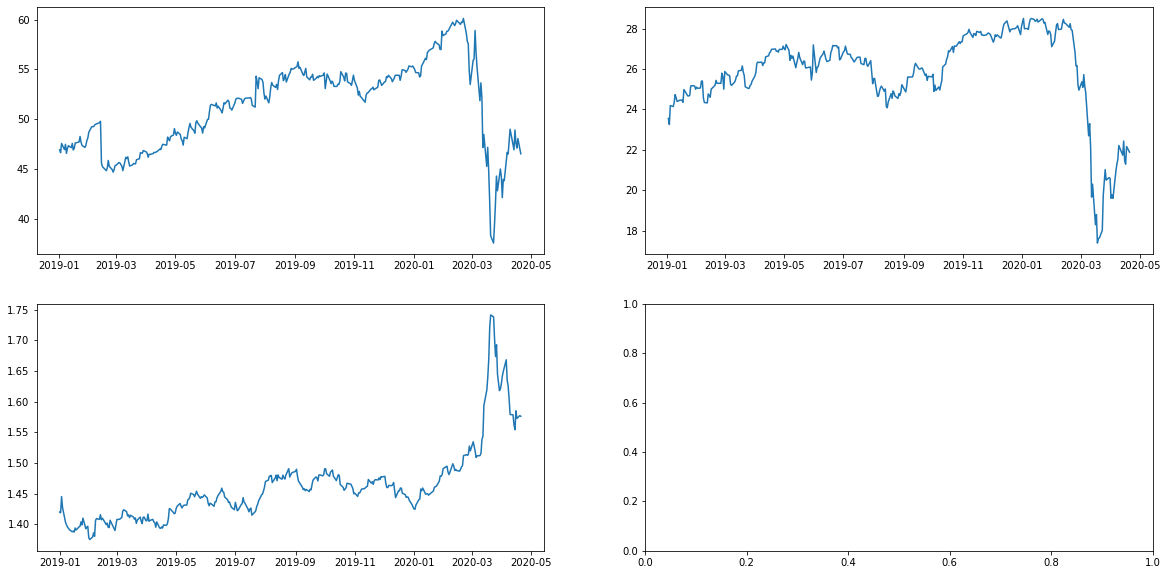

In [34]:
start = datetime(2019, 1, 1)
end = datetime.now()

cols_select = ['High', 'Low', 'Open', 'Close']
source_select = 'yahoo'

ko = web.DataReader('KO', source_select, start, end)[cols_select[-1]]
dax = web.DataReader('DAX', source_select, start, end)[cols_select[-1]]
eurud = web.DataReader('AUD=X', source_select, start, end)[cols_select[-1]]

# Grafico con respecto al año 2019 para mayor distinción

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes[0][0].plot(ko)
axes[0][1].plot(dax)
axes[1][0].plot(eurud)

In [35]:
test_stationarity(ko, 'KO')
print("")
test_stationarity(dax, 'DAX')
print("")
test_stationarity(eurud, 'EUR - UD')

////////// Test Dickey-Fuller - KO //////////
Test Statistic                  -1.861620
p-value                          0.350326
#Lags Used                       0.000000
Number of Observations Used    326.000000
Critical Value (1%)             -3.450569
Critical Value (5%)             -2.870447
Critical Value (10%)            -2.571515
dtype: float64

////////// Test Dickey-Fuller - DAX //////////
Test Statistic                  -1.908083
p-value                          0.328268
#Lags Used                       3.000000
Number of Observations Used    323.000000
Critical Value (1%)             -3.450759
Critical Value (5%)             -2.870530
Critical Value (10%)            -2.571560
dtype: float64

////////// Test Dickey-Fuller - EUR - UD //////////
Test Statistic                  -1.307500
p-value                          0.625734
#Lags Used                       1.000000
Number of Observations Used    338.000000
Critical Value (1%)             -3.449846
Critical Value (5%)      

Análisis: En todos los casos anteriores podemos ver que el "Test Statistic" no es menor que todos los "Critical Value", lo cual idica que ninguna serie es estacionaria.

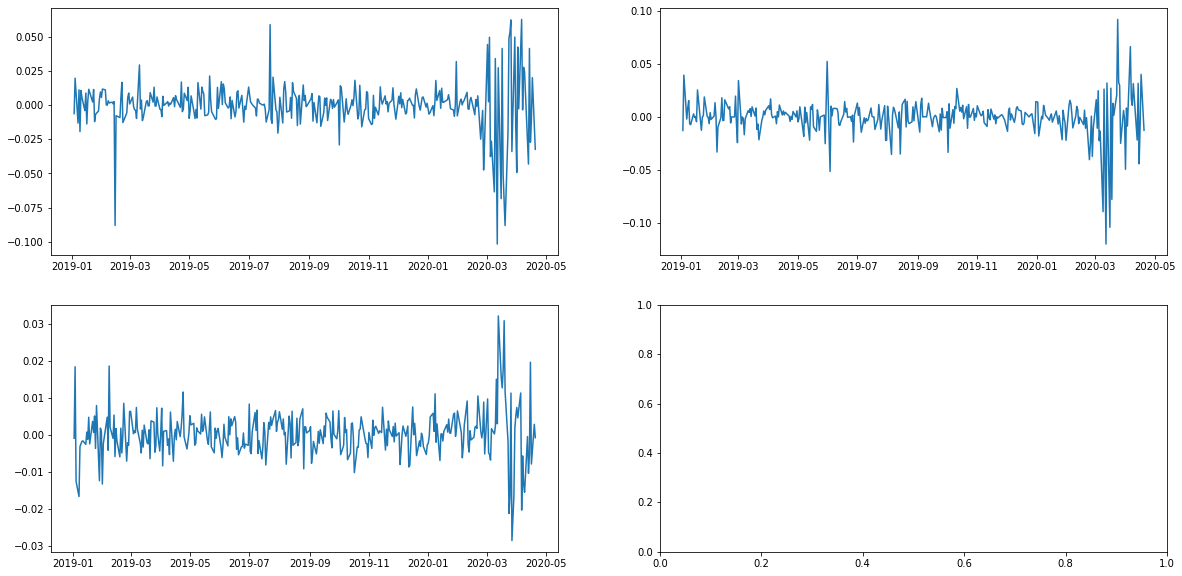

In [42]:
ko_return_log = np.log(ko).diff().dropna()
dax_return_log = np.log(dax).diff().dropna()
eurud_return_log = np.log(eurud).diff().dropna()


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axes[0][0].plot(ko_return_log)
axes[0][1].plot(dax_return_log)
axes[1][0].plot(eurud_return_log)

In [41]:
test_stationarity(ko_return_log, 'ko_return_log')
print("")

test_stationarity(dax_return_log, 'dax_return_log')
print("")

test_stationarity(eurud_return_log, 'eurud_return_log')

////////// Test Dickey-Fuller - ko_return_log //////////
Test Statistic                -7.400778e+00
p-value                        7.565408e-11
#Lags Used                     4.000000e+00
Number of Observations Used    3.210000e+02
Critical Value (1%)           -3.450887e+00
Critical Value (5%)           -2.870586e+00
Critical Value (10%)          -2.571590e+00
dtype: float64

////////// Test Dickey-Fuller - dax_return_log //////////
Test Statistic                -8.117768e+00
p-value                        1.178291e-12
#Lags Used                     5.000000e+00
Number of Observations Used    3.200000e+02
Critical Value (1%)           -3.450952e+00
Critical Value (5%)           -2.870615e+00
Critical Value (10%)          -2.571605e+00
dtype: float64

////////// Test Dickey-Fuller - eurud_return_log //////////
Test Statistic                -1.552260e+01
p-value                        2.273397e-28
#Lags Used                     0.000000e+00
Number of Observations Used    3.380000e+02
C

Análisis: En todos los casos anteriores podemos ver que el "Test Statistic" es menor que todos los "Critical Value", lo cual idica que ahora si TODAS LAS SERIES SON ESTACIONARIAS.

1.2- Encuentre el orden de integración de cada una de las series estudiadas anteriormente y realice una
comparación entre los correlogramas de cada series tanto en niveles como en retornos ( u
opcionalmente en primeras diferencias).

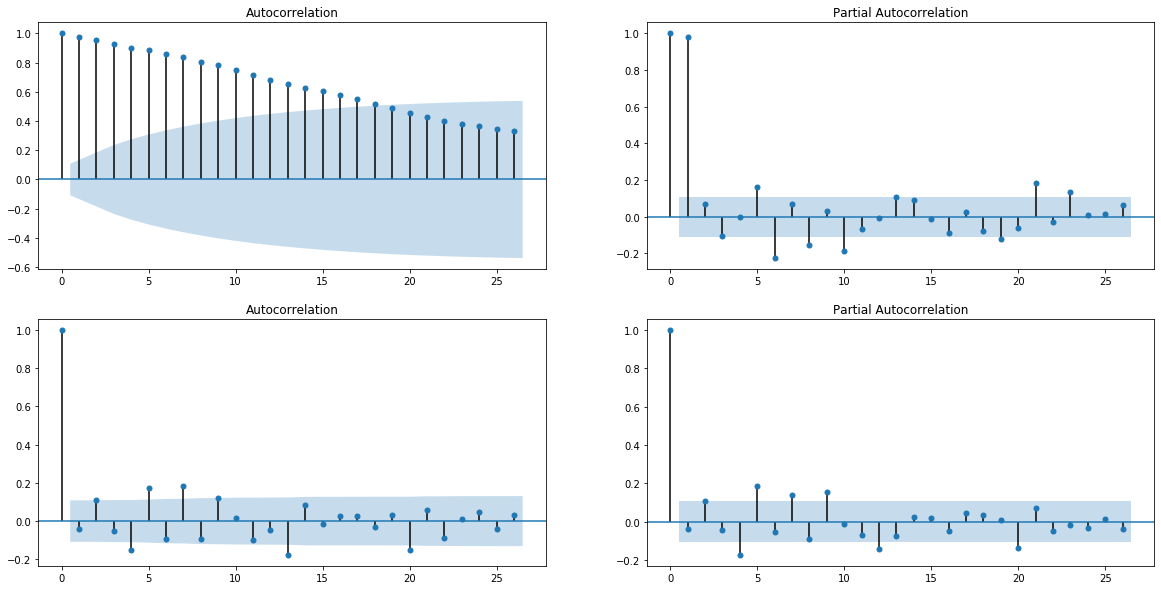

In [49]:
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plot_acf(ko, ax=axes[0][0])
plot_pacf(ko, ax=axes[0][1])
plot_acf(ko_return_log, ax=axes[1][0])
plot_pacf(ko_return_log, ax=axes[1][1])
print("")

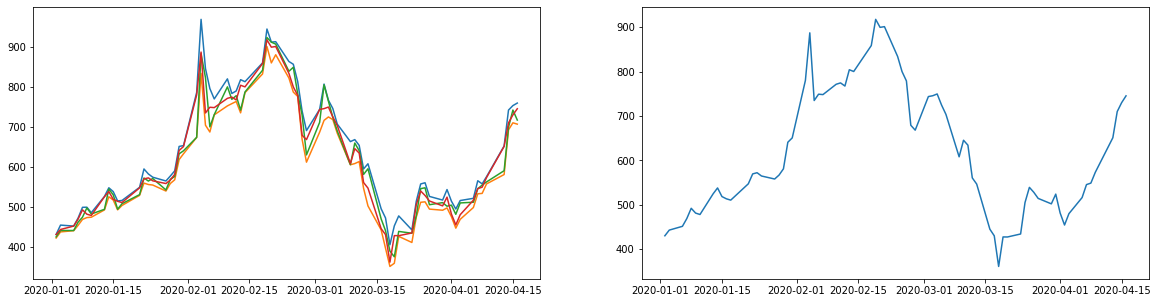

In [4]:
ticker_tesla = 'TSLA'

tsla = web.DataReader(ticker_tesla, 'yahoo', start, end)[cols_select]
only_close = tsla['Close'].copy()


# Grafico con respecto al año actual para mayor distinción
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))
axes[0].plot(tsla['2020':])
axes[1].plot(only_close['2020':])

ANALISIS: Se aprecia una tendencia al alza, luego de una caida vertiginosa que inició a fines de Febrero y que tuvo su pico mas bajo en la quincena de Marzo, así como una recaida a inicios de Abril.

1.3- Descargar la serie de precios de la acción de APLE y transformar la misma serie de precios Close
de la acción de APLE en sus retornos, presentar la gráfica de la serie de precios arriba y la serie
de los retornos abajo, analice.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f96d1a6f810>,
      dtype=object)

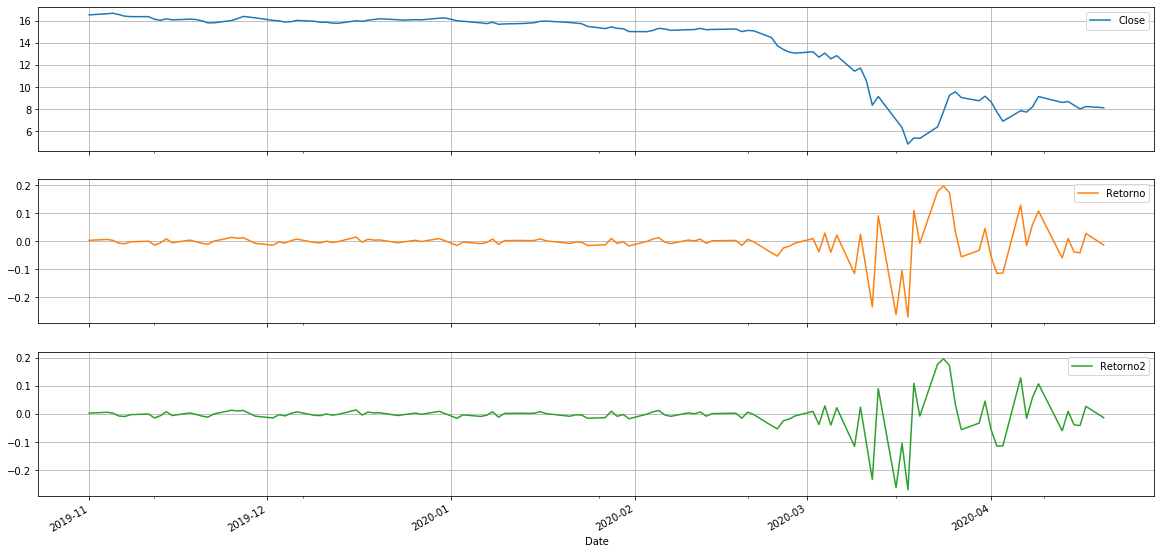

In [30]:
ticker_apple = 'APLE'

aapl = pd.DataFrame(web.DataReader(ticker_apple, 'yahoo', start, end)['Close'])


aapl['Retorno'] = np.log(aapl['Close']).diff()
aapl['Retorno2'] = apply_return_log(aapl['Close'])
#retorno = .dropna()

aapl['2019-11':].plot(subplots=True, figsize=(20, 10), grid=True)

ANALISIS: Podemos ver claramente como al aplicar retorno se consigue un comportamiento centrado en 0, estacionario.

In [29]:
apply_return_log(aapl)
aapl.head()

/home/villacorta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log
/home/villacorta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in log


,Close,Retorno
Date,,
2019-01-02,14.20,NaN
2019-01-03,14.26,0.004216
2019-01-04,14.61,0.024248
2019-01-07,14.80,0.012921
2019-01-08,15.18,0.025352
